In [1]:
%matplotlib inline

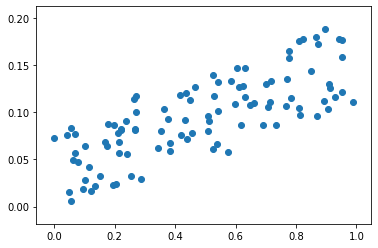

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Random 100 points by numpy
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.1*np.random.rand(100).astype(np.float32)

# plot data
plt.scatter(x_data, y_data)
plt.show()

Tensor("add:0", shape=(100,), dtype=float32)
0 [-0.42078838] [0.13582008]


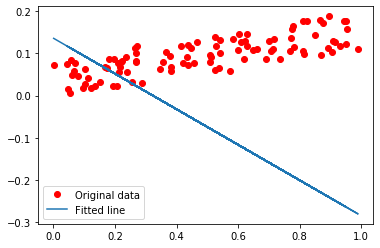

50 [-0.00876194] [0.10373443]


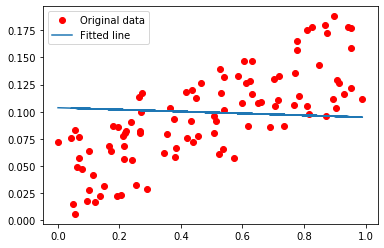

100 [0.08034475] [0.05776346]


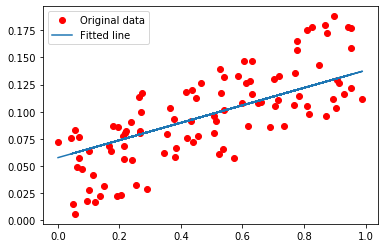

150 [0.10380205] [0.04566162]


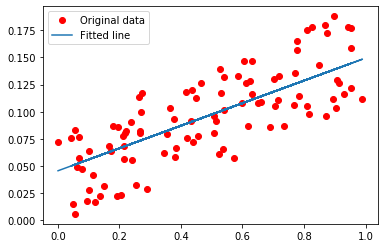

200 [0.10997719] [0.0424758]


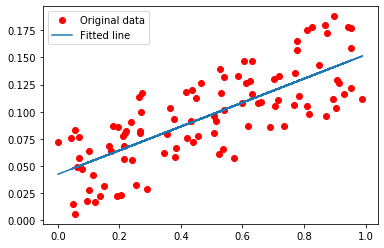

250 [0.1116028] [0.04163714]


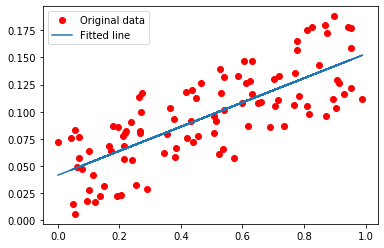

300 [0.11203074] [0.04141636]


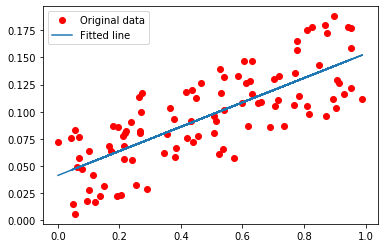

350 [0.11214338] [0.04135824]


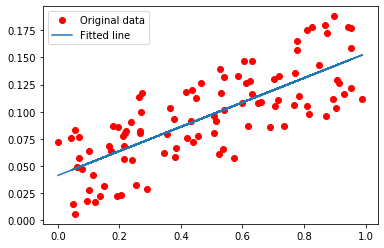

400 [0.11217304] [0.04134294]


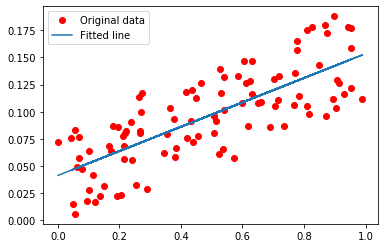

450 [0.11218084] [0.04133892]


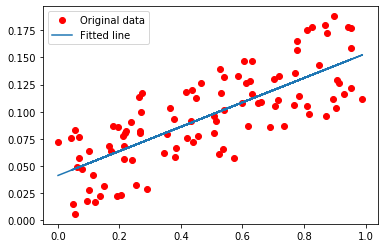

In [3]:
# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.03, but TensorFlow will
# figure that out for us.) 
# Use tensorflow to find weighting of fitting

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b
print(y)
tf_x = tf.placeholder(tf.float32, x_data.shape)     # input x
tf_y = tf.placeholder(tf.float32, y_data.shape)     # input y

# Minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.2)
train = optimizer.minimize(loss)

# Before starting, initialize the variables.  We will 'run' this first.
init = tf.global_variables_initializer()

# Launch the graph.
sess = tf.Session()
sess.run(init)

# Fit the line.
for step in range(500):
    sess.run(train)
    if step % 50 == 0:
        print(step, sess.run(W), sess.run(b))
        plt.plot(x_data, y_data, 'ro', label='Original data')
        plt.plot(x_data, sess.run(W) * x_data + sess.run(b), label='Fitted line')
        plt.legend()
        plt.show()

# Learns best fit is W: [0.1], b: [0.03]